In [159]:
!pip install pydot

In [160]:
import numpy as np
import graphviz
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from  mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from IPython.display import Image
import pydot

In [77]:
feature_names = ['sepal length', 'sepal width', 'petal length','petal width']
target_name = ['species']

In [71]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns = feature_names)
df['species'] = dataset.target
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [134]:
clf = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target,
                                                   random_state = 42, test_size = 0.3)

In [135]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [136]:
export_graphviz(clf, out_file = 'tree.dot', class_names = dataset.target_names, 
                feature_names = dataset.feature_names)

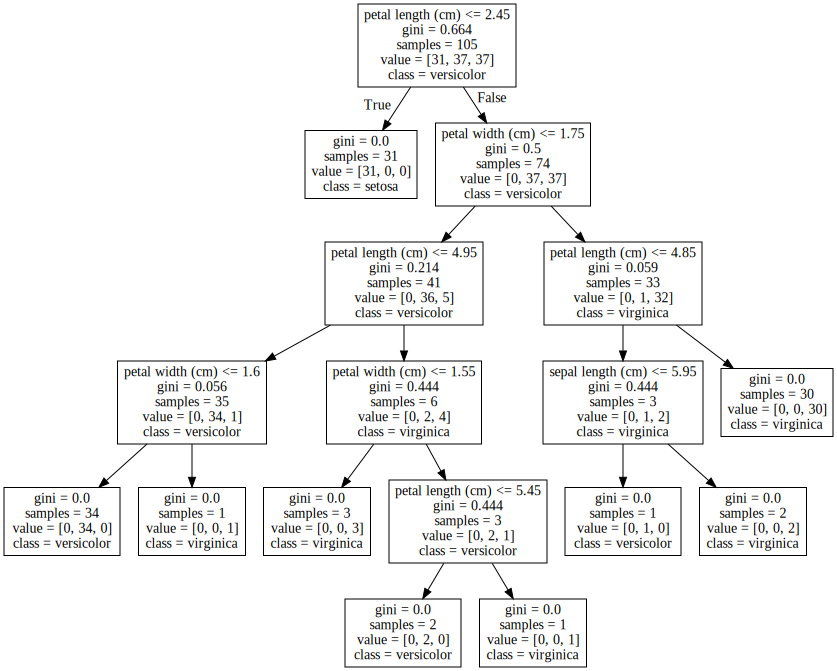

In [137]:
with open('tree.dot') as f:
    dot_graph = f.read()
src = graphviz.Source(dot_graph)
src

In [161]:
(graph, ) = pydot.graph_from_dot_file('tree.dot', encoding = 'utf8')
graph.write_png('tree.png')

In [138]:
y_pred = clf.predict(x_test)

In [139]:
accuracy_score(y_test, y_pred)

1.0

In [148]:
x_train_2 = x_train[:, :2]

In [151]:
clf2 = DecisionTreeClassifier()
clf2.fit(x_train_2, y_train)

DecisionTreeClassifier()

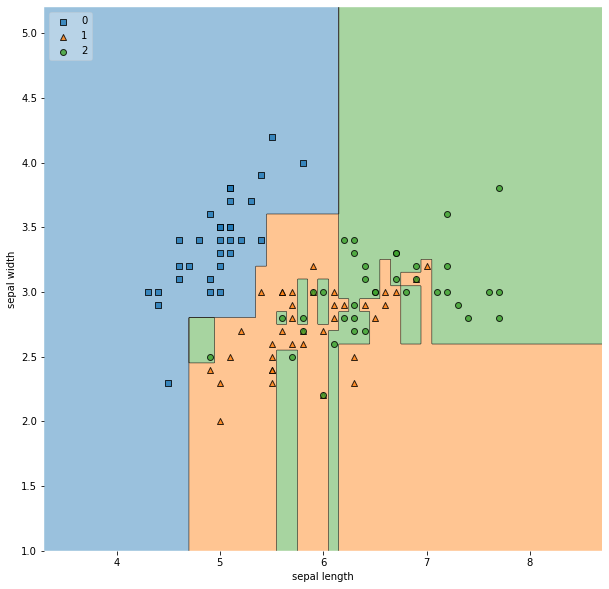

In [155]:
plt.figure(figsize = (10, 10))

plot_decision_regions(X = x_train_2, y = y_train, clf = clf2, legend = 2)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()